In [38]:
!pip install numpy pandas matplotlib seaborn statsmodels scipy copulalib pandas_montecarlo

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_montecarlo
import statsmodels.api as sm # statistical model library
import scipy
import copulalib

%matplotlib inline

In [137]:
files = {"amd-usd": r"https://bit-rapid.com/ds_homework/data/amd.csv",
        "AT&S-usd": r"https://bit-rapid.com/ds_homework/data/AT&S_bereinigt.csv",
        "btc-eur": r"https://bit-rapid.com/ds_homework/data/btc-eur-max.csv",
        "btc-usd": r"https://bit-rapid.com/ds_homework/data/btc-usd-max.csv",
        "crude-oil-prices-europe-usd": r"https://bit-rapid.com/ds_homework/data/crude_oil_prices_brent_europe.csv",
        "dax-eur": r"https://bit-rapid.com/ds_homework/data/DAX.csv",
        #"eur-usd": r"https://bit-rapid.com/ds_homework/data/eur-usd.csv",
        "gold-usd": r"https://bit-rapid.com/ds_homework/data/gold.csv",
        "intel-usd": r"https://bit-rapid.com/ds_homework/data/Intel_bereinigt.csv",
         "ltc-eur": r"https://bit-rapid.com/ds_homework/data/ltc_eur_max.csv",
         "ltc-usd": r"https://bit-rapid.com/ds_homework/data/ltc_usd_max.csv",
        "nikkei": r"https://bit-rapid.com/ds_homework/data/Nikkei 225.csv",
         "sp500": r"https://bit-rapid.com/ds_homework/data/sp500.csv",
        "ripple-usd": r"https://bit-rapid.com/ds_homework/data/xrp_usd.csv",
         "nvidia": r"https://bit-rapid.com/ds_homework/data/nvidia.csv",
        "ripple-eur": r"https://bit-rapid.com/ds_homework/data/xrp_eur.csv"}

data = {}

In [138]:
dates = pd.date_range('01-01-2014', '10-31-2017')

for key, value in files.items():
    data[key] = pd.read_csv(files[key], sep=";", decimal=",")
    data[key]['date'] =  pd.to_datetime(data[key]['date'], format='%Y-%m-%d')
    data[key] = data[key].sort_values(by=['date'], ascending=[True])
    data[key].set_index('date', inplace=True)
    data[key] = data[key].resample('D').ffill().reset_index()

In [42]:
def plot_datePrice(string):
    price = data[string]['price']
    date = data[string]['date']
    plt.plot(date, price)

In [43]:
def findCorrelation(string, string1):
    return scipy.stats.spearmanr(data[string]['price'], data[string1]['price'])[0][1]

In [44]:
prices = pd.DataFrame()

for key, value in data.items():
    prices = pd.concat([prices, data[key]['price'].rename('price ' + key)], axis=1)

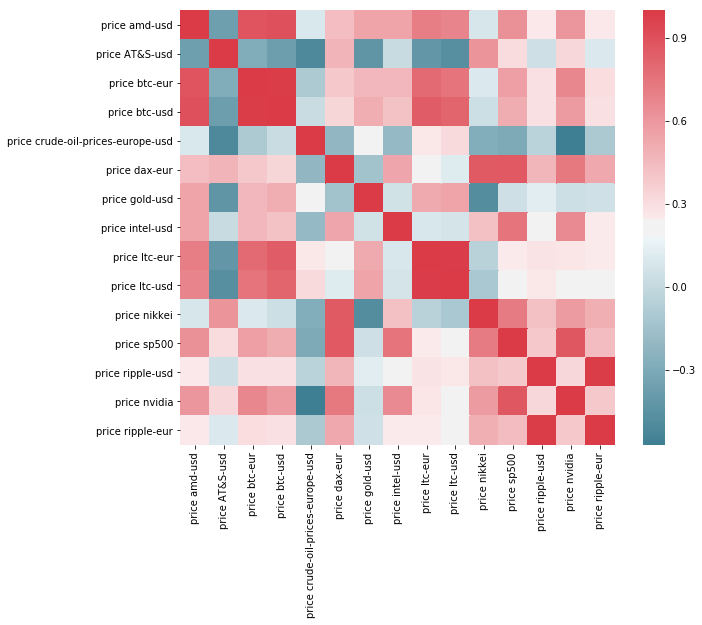

In [45]:
f, ax = plt.subplots(figsize=(10, 8))
corr = prices.corr(method='spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Heat Map Description

This Heat Map shows the correlation between the historical prices of the Cryptocurrencies Bitcoin (BTC), Litecoin (LTC), Ripple (XRP) and the chosen stock data in the time from 01/01/2014 - 31/10/2017.

This first Heat Map illustrates all the stock exchange data that we initially expected to have a high correlation to at least one of the Cryptocurrencies. After preparing the data and visualizing the correlations in this Heat Map, we have noticed that some of the chosen data does not have a high correlation or even a negative correlation to the Cryptocurrencies.
For this reason we have taken the following data out of the scope:
* Gold price
* Oil price
* AT&S Stock Exchange

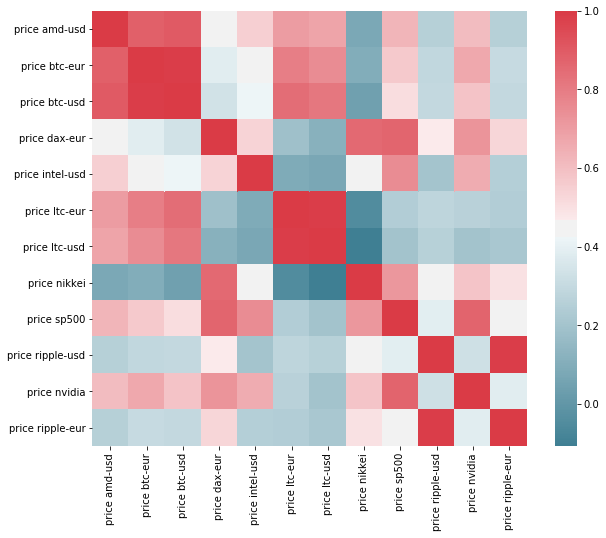

In [46]:
prices = pd.DataFrame()

for key, value in data.items():
    if key not in ['gold-usd', 'crude-oil-prices-europe-usd', 'AT&S-usd']:
        prices = pd.concat([prices, data[key]['price'].rename('price ' + key)], axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = prices.corr(method='spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

This improved Heat Map now shows only positive correlated data. For further improvement, we have in a next step also removed the stock exchange data of Nikkei and Intel.

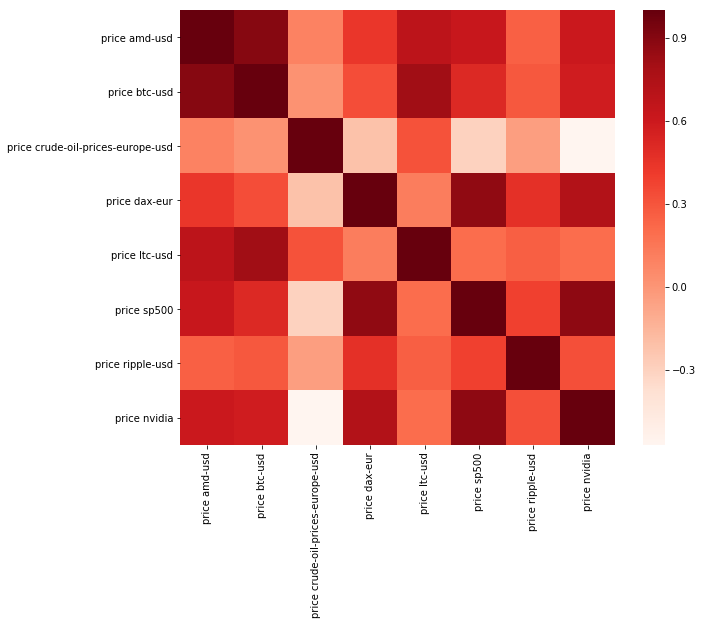

In [47]:
prices = pd.DataFrame()

for key, value in data.items():
    if key not in ['gold-usd', 'AT&S-usd', 'nikkei', 'intel-usd', 'ripple-eur', 'btc-eur', 'ltc-eur']:
        prices = pd.concat([prices, data[key]['price'].rename('price ' + key)], axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = prices.corr(method='spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="Reds", square=True, ax=ax)

By this further optimization we have been able to illustrate a Heat Map which shows only data with a correlation greater than 0,5. 
A high correlation (between 0,5 and 0,8) can be observed for example between:
* BTC and AMD
* BTC and DAX
* BTC and SP500


* LTC and AMD
* LTC and DAX
* LTC and SP500
* LTC and NVIDIA


* XRP and AMD
* XRP and DAX
* XRP and SP500

While a very high correlation (between 0,8 and 1,0) can be seen between:
* BTC and LTC
* BTC and XRP
* BTC and NVIDIA


* LTC and BTC
* LTC and XRP


* XRP and BTC
* XRP and LTC
* XRP and NVIDIA

This comparison shows, that all three Cryptocurrencies show nearly the same (high) correlations to AMD, DAX, SP500 and NVIDIA. It is interesting to notice that half of these stock exchange rates are direct company values and the other half are economical values.

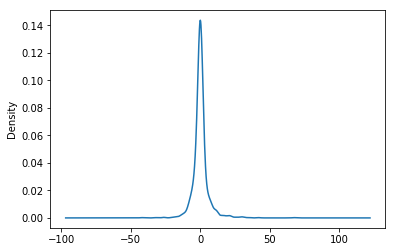

In [97]:
(prices['price ltc-usd'].pct_change()*100).plot(kind="kde")

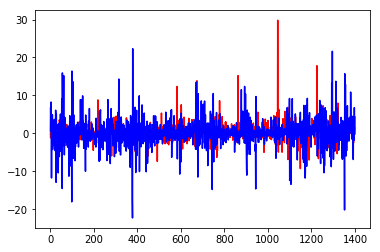

In [49]:
plt.plot(prices['price nvidia'].pct_change()*100, c="red")
plt.plot(prices['price btc-usd'].pct_change()*100, c="blue")
#plt.plot(prices['price amd-usd'].pct_change(), c="green")
plt.show()

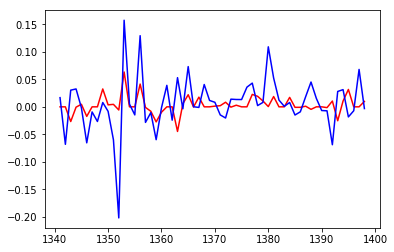

In [50]:
plt.plot(prices['price nvidia'][-60:-1].pct_change(), c="red")
plt.plot(prices['price btc-usd'][-60:-1].pct_change(), c="blue")
plt.show()

In [51]:
print(prices['price nvidia'].describe())
print(prices['price btc-usd'].describe())

count    1400.000000
mean       55.212629
std        49.956400
min        15.360000
25%        19.887499
50%        28.590000
75%        87.970001
max       206.809998
Name: price nvidia, dtype: float64
count    1400.000000
mean      892.360003
std      1090.360568
min       172.147900
25%       344.050600
50%       508.105050
75%       789.187200
max      6368.651641
Name: price btc-usd, dtype: float64


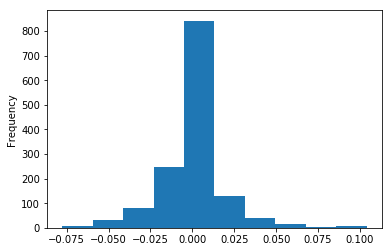

In [52]:
data['crude-oil-prices-europe-usd']['price'].pct_change().plot(kind="hist")

In [54]:
data['btc-usd']['price'].iloc[-1]

6368.65164135745

In [ ]:
def fanchart(data):
    N = 1000
    x = np.linspace(0, 10, N)
    y = x**2
    ones = np.ones(N)

    vals = [30, 20, 10] # Values to iterate over and add/subtract from y.

    fig, ax = plt.subplots()

    for i, val in enumerate(vals):
        alpha = 0.5*(i+1)/len(vals) # Modify the alpha value for each iteration.
        ax.fill_between(x, y+ones*val, y-ones*val, color='red', alpha=alpha)

    ax.plot(x, y, color='red') # Plot the original signal

    plt.show()

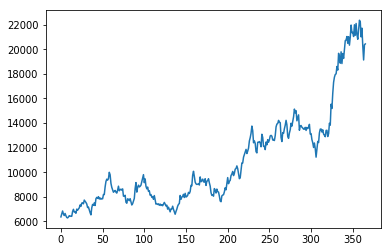

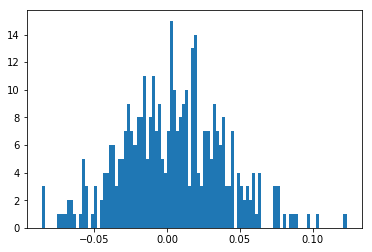

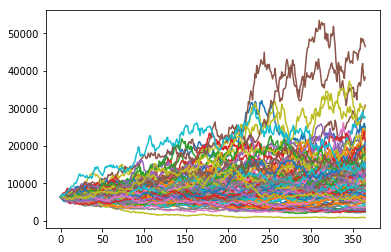

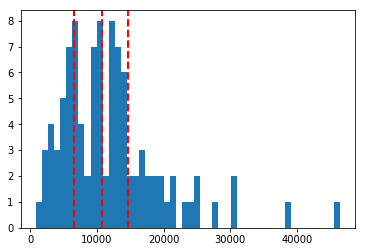

----------------- btc-usd -----------------
CAGR = 73.6%
Annual Volatility = 70.17%
Mean = 12061.1292069
Mean = 12280.9148201


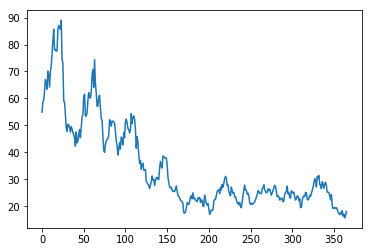

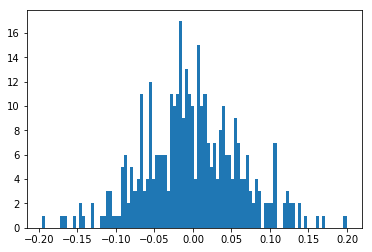

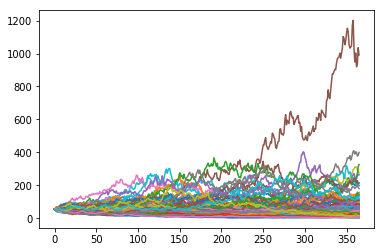

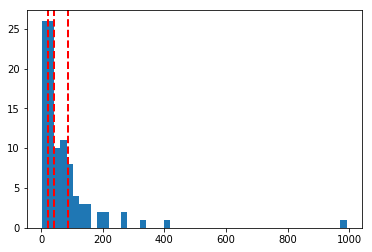

----------------- ltc-usd -----------------
CAGR = 23.32%
Annual Volatility = 110.4%
Mean = 75.7285278995
Mean = 51.9909885671


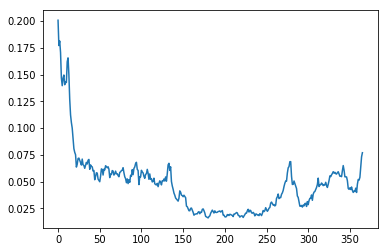

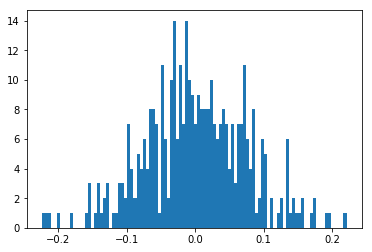

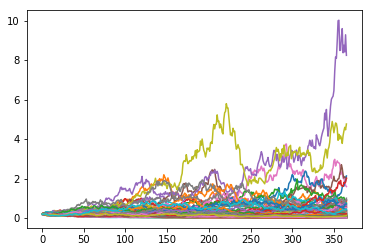

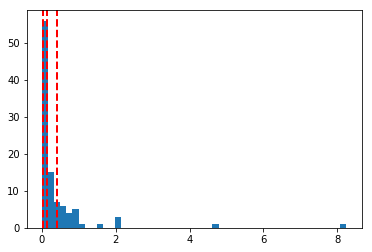

----------------- ripple-usd -----------------
CAGR = 68.66%
Annual Volatility = 147.86%
Mean = 0.426779871751
Mean = 0.23644370254


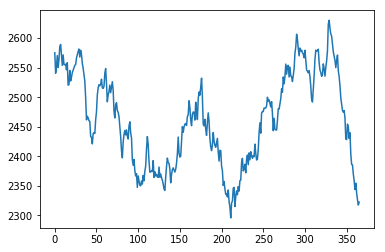

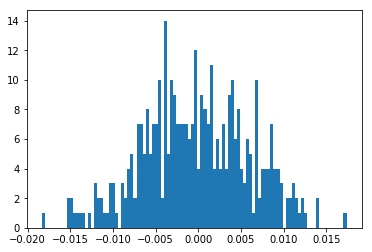

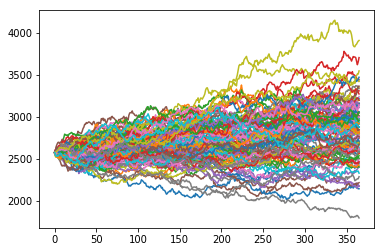

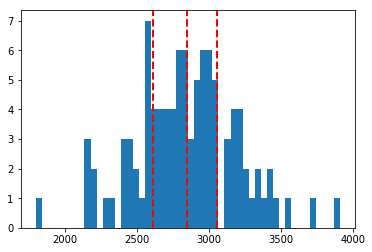

----------------- sp500 -----------------
CAGR = 9.28%
Annual Volatility = 12.28%
Mean = 2847.92309721
Mean = 2818.68143621


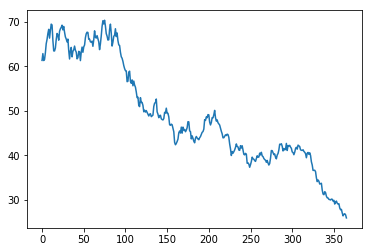

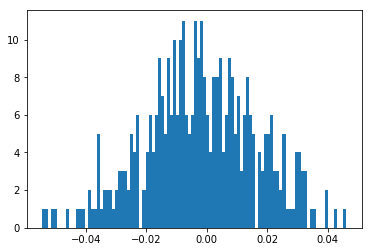

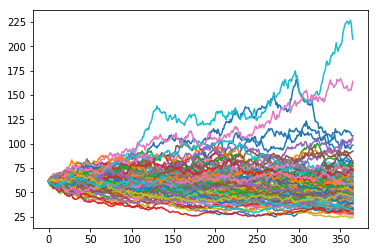

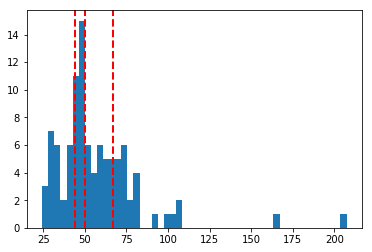

----------------- crude-oil-prices-europe-usd -----------------
CAGR = -14.11%
Annual Volatility = 35.31%
Mean = 57.1394039982
Mean = 63.0353268236


In [59]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

def monte_carlo(t, name):
    days = len(data[name])
    cagr = (((data[name]['price'].iloc[-1] / data[name]['price'].iloc[0])) ** (365.0/days)) - 1
    mu = cagr
    returns = prices['price ' + name].pct_change()
    vol = prices['price ' + name].pct_change().std()*math.sqrt(365)
    T = t
    daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
    S = data[name]['price'].iloc[-1]
    #set starting price and create price series generated by above random daily returns
    price_list = [S]

    for x in daily_returns[0:T]:
        price_list.append(price_list[-1]*x)

    #Generate Plots - price series and histogram of daily returns
    plt.plot(price_list)
    plt.show()
    plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
    plt.show()
    result = []
    for i in range(1000):
        daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
        
        price_list = [S]
 
        for x in daily_returns[0:T]:
            price_list.append(price_list[-1]*x)
 
        #plot data from each individual run which we will plot at the end
        plt.plot(price_list)
        result.append(price_list[-1])
    
    plt.show()
    plt.axvline(np.percentile(result,25), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(np.percentile(result,50), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(np.percentile(result,75), color='r', linestyle='dashed', linewidth=2)
    plt.hist(result,bins=50)
    plt.show()
    print('-----------------', name , '-----------------')
    print ('CAGR =',str(round(cagr,4)*100)+"%")
    print ("Annual Volatility =",str(round(vol,4)*100)+"%")
    print("Mean =", np.mean(result))
    print("Mean =", np.mean(result[0:30])) 
    
    
for key, value in data.items():
    if key in ['btc-usd', 'ltc-usd', 'ripple-usd']:
        pass

monte_carlo(365, 'btc-usd')
monte_carlo(365, 'ltc-usd')
monte_carlo(365, 'ripple-usd')
monte_carlo(365, 'sp500')
monte_carlo(365, 'crude-oil-prices-europe-usd')

In [115]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=3):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [116]:
get_truncated_normal().rvs()

1.777380777788804

In [134]:
from copulalib.copulalib import Copula
foo=Copula(prices['price amd-usd'], prices['price btc-usd'], family='clayton')

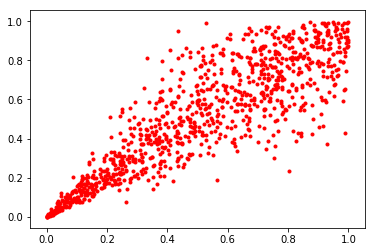

In [135]:
uc, vc = foo.generate_uv(1000)
#fig = plt.figure()
#fig.add_subplot(4,2,2)
#plt.scatter(uc, vc, marker='.', color='r')
plt.scatter(uc, vc, marker='.', color='r')
plt.show()

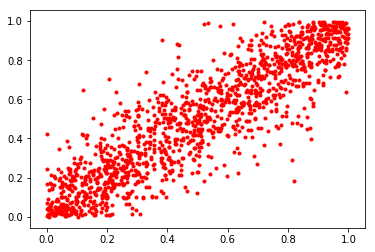

In [133]:
foo=Copula(prices['price amd-usd'], prices['price btc-usd'],family='frank')
uc, vc = foo.generate_uv(1400)

plt.scatter(uc, vc, marker='.', color='r')

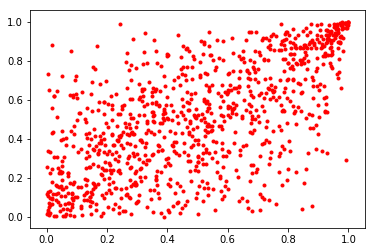

In [110]:
foo=Copula(prices['price amd-usd'], prices['price ltc-usd'],family='gumbel')
uc, vc = foo.generate_uv(1000)
#fig = plt.figure()
#fig.add_subplot(4,2,2)
plt.scatter(uc, vc, marker='.', color='r')
plt.show()

0.68062956627


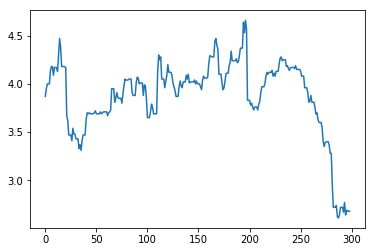

In [17]:
print(foo.sr)
plt.plot(prices['price amd-usd'][0:299])

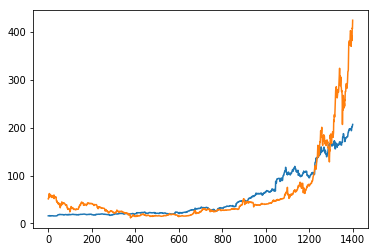

In [18]:
plt.plot(prices['price nvidia'])
plt.plot(prices['price btc-usd']/15)
plt.show()

In [1]:
from sklearn.svm import SVR
import matplotlib.pyplot as pyplot

In [ ]:
svr_len=SVR(kernel="linear", C=1e3)
svr_poly = SVR(kernel="polynomial", C=1e3, degree=2)
svr_rbf =SVR(kernel="rbf", C=1e3, gamma=0.1)
svr_lim